In [1]:
%run aug21-demo-corr-func.ipynb

20.0 16
[ 0.68       -0.76        0.06133333  0.19709091  0.13536424 -0.06061856
 -0.28941176 -0.00527331 -0.16601307  0.10916427 -0.03308642 -0.09363985
  0.14135747 -0.02187845 -0.05268966]
15
Computing amplitudes (Corrfunc/utils.py)
Evaluating xi (Corrfunc/utils.py)


NameError: name 'xi_ana_spline' is not defined

In [7]:
# values imported from aug21-demo-corr-func.ipynb
print("rmin =",rmin)
print("rmax =",rmax)
print("nthreads =",nthreads)
print("bin_edges =",bin_edges)
print("mumax =",mumax)
print("nmubins =",nmubins)
print("boxsize =",boxsize)
print("periodic =",periodic)

rmin = 0.0
rmax = 20.0
nthreads = 1
bin_edges = [1.00000000e-02 1.34266667e+00 2.67533333e+00 4.00800000e+00
 5.34066667e+00 6.67333333e+00 8.00600000e+00 9.33866667e+00
 1.06713333e+01 1.20040000e+01 1.33366667e+01 1.46693333e+01
 1.60020000e+01 1.73346667e+01 1.86673333e+01 2.00000000e+01]
mumax = 1.0
nmubins = 1
boxsize = 20.0
periodic = False


## cubic spline

In [38]:
proj_type = 'generalr'
kwargs = {'order': 0} 
projfn = 'spline.dat'
nprojbins = int(nbins)
spline.write_bases(rmin, rmax, nprojbins, projfn, ncont=1000, **kwargs)

'spline.dat'

In [39]:
dd_res_spline0, dd_proj_spline0, _ = DDsmu(1, nthreads, bin_edges, mumax, nmubins, x, y, z,
                                           boxsize=boxsize, periodic=periodic, proj_type=proj_type,
                                           nprojbins=nprojbins, projfn=projfn)

In [40]:
dr_res_spline0, dr_proj_spline0, _ = DDsmu(0, nthreads, bin_edges, mumax, nmubins, x, y, z,
                                           X2=x_rand, Y2=y_rand, Z2=z_rand, boxsize=boxsize,
                                           periodic=periodic, proj_type=proj_type, nprojbins=nprojbins, projfn=projfn)

In [41]:
rr_res_spline0, rr_proj_spline0, qq_proj_spline0 = DDsmu(1, nthreads, bin_edges, mumax, nmubins,
                                                         x_rand, y_rand, z_rand, boxsize=boxsize, periodic=periodic,
                                                         proj_type=proj_type, nprojbins=nprojbins, projfn=projfn)

In [42]:
amps = compute_amps(nprojbins, nd, nd, nr, nr, dd_proj_spline0, dr_proj_spline0,
                    dr_proj_spline0, rr_proj_spline0, qq_proj_spline0)

Computing amplitudes (Corrfunc/utils.py)


In [43]:
xi_spline0 = evaluate_xi(amps, r_fine, proj_type, rbins=bin_edges, projfn=projfn)

Evaluating xi (Corrfunc/utils.py)


array([1.00000000e-02, 1.34266667e+00, 2.67533333e+00, 4.00800000e+00,
       5.34066667e+00, 6.67333333e+00, 8.00600000e+00, 9.33866667e+00,
       1.06713333e+01, 1.20040000e+01, 1.33366667e+01, 1.46693333e+01,
       1.60020000e+01, 1.73346667e+01, 1.86673333e+01, 2.00000000e+01])

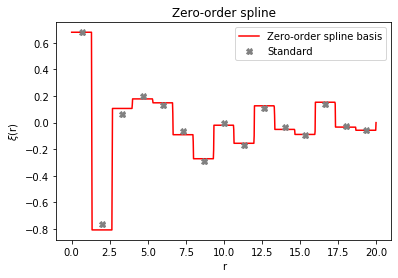

In [47]:
plt.plot(r_fine, xi_spline0, color='red', label='Zero-order spline basis')
plt.plot(r_avg, xi_ls, marker='X', ls='None', color='grey', label='Standard')
plt.xlabel(r'r')
plt.ylabel(r'$\xi$(r)')
plt.title('Zero-order spline')
plt.legend()
bin_edges

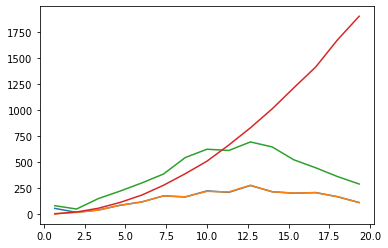

In [9]:
plt.plot(r_avg,dd)
plt.plot(r_avg,dd_spline)
plt.plot(r_avg,rr)
plt.plot(r_avg,rr_ana_spline)